# Chargement des modules

In [119]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from functions import *
import seaborn as sns

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.covariance import GraphicalLassoCV

In [120]:
data1_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/data1.csv"
target1_path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/target1.csv"

## Chargement des données et visualisation 
data = pd.read_csv(data1_path)
target = pd.read_csv(target1_path)
data = data.fillna(data.mean(axis=0)) #remplacer les Nan par la moyenne

data.sample(5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
133,0.327181,0.868277,0.453206,0.588056,0.916677,-0.126864,0.873866,0.848718,0.639373,0.150470,1.138728,-0.616178,0.531988,0.644449,0.430275,1.960546,1.059111,0.698387,1.070097,-0.553356
215,-1.377417,-1.119478,-1.572312,-1.666774,-1.402896,-1.186679,-1.741035,-1.427646,-1.831620,-1.546384,1.757282,-1.038078,-2.301384,-1.834962,-1.194472,0.076856,-1.243380,-1.763895,-1.118816,-1.069920
286,-1.514289,-1.788904,-1.442421,-1.900684,-1.313764,-2.035041,-1.860065,-2.162014,-2.276788,-1.328467,0.399623,-1.560349,0.087815,-2.316958,-1.794204,-0.477422,-1.355624,-2.242153,-1.539928,-1.112142
288,0.500189,0.546495,0.386594,0.471435,0.646121,0.184400,0.557093,0.616226,0.635812,0.351170,-0.315403,0.553143,0.948067,0.619518,-0.001765,0.110554,0.176178,0.264086,0.220480,0.348306
228,0.806807,0.743125,0.337548,0.611280,-0.284397,1.107195,0.702779,0.486308,1.024411,0.828825,0.488638,0.522156,0.012348,1.044865,0.809749,0.701666,-0.169701,0.608841,0.830158,0.177990


# Question 1-2

In [4]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Séparation de la variable V0 des autres variables
X = data.drop('V0', axis=1)
y = data['V0']

# Standardisation des données pour améliorer les performances de Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de la régression Lasso avec sélection automatique du meilleur alpha
# la paramètre alpha nous donne le diamètre de la boulle de recherche 
lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)

# Identification des variables sélectionnées par Lasso (non nulles)
coefficients = lasso.coef_
selected_features = X.columns[coefficients != 0]

# Affichage de la couverture de Markov de V0
print(f"La couverture de Markov de V0 comprend les variables suivantes : {selected_features.tolist()}")

La couverture de Markov de V0 comprend les variables suivantes : ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18']


## Question 3

In [5]:
# Standardisation des données pour améliorer les performances de Lasso
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
data_scaled.sample(4)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
377,-1.045949,-0.675170,-9.195910e-01,-1.142964,-1.411383,-0.143962,-1.157691e+00,-1.314409,-1.138761,-1.188150,-0.021476,-0.728721,1.276590,-1.094782,-0.713294,-0.659235,-1.335531e+00,-1.062880,-1.022133,-0.429460
11,0.370090,0.663981,4.128296e-01,0.463546,0.542954,0.582949,8.285082e-01,0.904561,0.652929,-0.084477,-1.265229,-0.163815,0.259622,0.733780,0.149668,-0.377882,7.465245e-01,0.835821,0.238559,0.375737
57,-0.190113,0.930991,-1.259174e-17,0.314433,0.142046,1.190372,-7.651713e-18,0.454173,0.537177,-0.002285,0.656480,0.357727,-0.031254,0.642621,1.132684,0.928110,2.595286e-01,0.820334,0.869442,0.115699
267,0.853385,-1.057290,9.190028e-01,0.548073,0.486494,-0.713290,2.936597e-01,0.338399,0.081857,0.541090,-1.715532,1.137988,2.151527,-0.009898,-0.225539,-0.824396,8.947451e-19,-0.488127,-0.271120,0.260152


In [6]:
Cause, Effet, Score = [],[],[] #garder en mémoire les valeurs 

for col in data_scaled.columns:

    # Séparation de la variable "col" des autres variables
    X = data_scaled.drop(col, axis=1)
    y = data_scaled[col]

    # Application de la régression Lasso avec sélection automatique du meilleur alpha via de la cross validation
    # la paramètre alpha nous donne le diamètre de la boulle de recherche 
    lasso = LassoCV(cv=5, random_state=0).fit(X, y)

    # Identification des variables (non nulles) sélectionnées par la méthode Lasso 
    coefficients = lasso.coef_

    selected_features = X.columns[np.abs(coefficients) >1e-3] #selection des variables significative
    selected_coeff = np.abs(coefficients)[np.abs(coefficients) >1e-3]

    for c,s in zip(selected_features,selected_coeff):
        Cause.append(c)
        Effet.append(col)
        Score.append(s)
    # Affichage de la couverture de Markov de V0
    print(f"La couverture de Markov estimée de {col} comprend les variables suivantes : {selected_features.tolist()}")
    print(f"Les scores de {col} pour les variables précédentes sont les suivant : {np.round(selected_coeff,2).tolist()}")

predictions_network1 = pd.DataFrame(np.array([Cause, Effet, Score]).T,columns=["Cause", "Effet", "Score"])


predictions_network1 = predictions_network1.sort_values(by="Score", ascending=False)

predictions_network1

La couverture de Markov estimée de V0 comprend les variables suivantes : ['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V16', 'V17', 'V18']
Les scores de V0 pour les variables précédentes sont les suivant : [0.23, 0.11, 0.14, 0.0, 0.11, 0.13, 0.43, 0.18, 0.02, 0.05, 0.01, 0.03, 0.02, 0.07, 0.07]
La couverture de Markov estimée de V1 comprend les variables suivantes : ['V0', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']
Les scores de V1 pour les variables précédentes sont les suivant : [0.33, 0.28, 0.0, 0.07, 0.24, 0.15, 0.65, 0.16, 0.03, 0.02, 0.36, 0.01, 0.02, 0.08, 0.08, 0.05]
La couverture de Markov estimée de V2 comprend les variables suivantes : ['V0', 'V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V12', 'V13', 'V14', 'V16', 'V18', 'V19']
Les scores de V2 pour les variables précédentes sont les suivant : [0.16, 0.22, 0.41, 0.08, 0.07, 0.09, 0.0, 0.18, 0.01, 0.04, 0.03, 0.01, 0.04, 0.0]
La couverture de 

,Cause,Effet,Score
157,V15,V10,0.8573527882645202
243,V11,V19,0.7025976822971547
21,V8,V1,0.6455884599770171
195,V18,V14,0.5761305817274633
198,V10,V15,0.5578053595887963
...,...,...,...
241,V8,V19,0.0019375435588144363
69,V17,V4,0.0018355548155975514
55,V16,V3,0.00180032655226098
52,V10,V3,0.0017745136812858564


## Question 4 - 5

In [7]:
## Construction de la matrice de casalité avec le tableau target pour le réseau 1

n = len(data.columns)

causal_matrix = pd.DataFrame(np.zeros((n,n)),index=data.columns,columns=data.columns)

for c1,c2 in zip(target.iloc[:,0].values,target.iloc[:,1].values):
    causal_matrix.loc[c1][c2] = 1

causal_matrix


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
V1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
V3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
V5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
V6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
V8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
V9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#matrice de causalité prédite avec la méthode Lasso 

causal_matrix_pred = pd.DataFrame(np.zeros((n,n),dtype=np.float64),index=data.columns,columns=data.columns) #initialisation du dataframe

for i in range(len(predictions_network1)):
    c1,c2 = predictions_network1.iloc[i,0],predictions_network1.iloc[i,1] #correspond au deux noms de colonne
    causal_matrix_pred.loc[c1][c2] = np.round(float(predictions_network1.iloc[i,2]),2) #correspond aux scores arrondi à 10-2   

causal_matrix_pred

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V0,0.00,0.33,0.16,0.17,0.00,0.18,0.00,0.18,0.23,0.32,0.00,0.10,0.0,0.04,0.00,0.00,0.04,0.00,0.12,0.00
V1,0.23,0.00,0.22,0.00,0.09,0.33,0.00,0.17,0.25,0.18,0.02,0.06,0.0,0.19,0.01,0.09,0.13,0.18,0.05,0.00
V2,0.11,0.28,0.00,0.30,0.07,0.11,0.06,0.02,0.08,0.00,0.00,0.00,0.0,0.05,0.02,0.00,0.01,0.00,0.04,0.00
V3,0.14,0.00,0.41,0.00,0.09,0.09,0.05,0.00,0.12,0.15,0.12,0.00,0.0,0.13,0.06,0.00,0.00,0.00,0.04,0.00
V4,0.00,0.07,0.08,0.09,0.00,0.16,0.37,0.19,0.00,0.00,0.00,0.00,0.0,0.04,0.00,0.00,0.32,0.00,0.00,0.00
V5,0.11,0.24,0.07,0.00,0.14,0.00,0.08,0.04,0.05,0.01,0.12,0.00,0.0,0.07,0.18,0.00,0.25,0.31,0.04,0.00
V6,0.00,0.00,0.09,0.06,0.54,0.11,0.00,0.06,0.06,0.03,0.09,0.08,0.0,0.10,0.00,0.00,0.00,0.17,0.07,0.00
V7,0.13,0.15,0.00,0.00,0.18,0.04,0.04,0.00,0.01,0.21,0.28,0.00,0.0,0.03,0.00,0.03,0.08,0.03,0.11,0.00
V8,0.43,0.65,0.18,0.17,0.00,0.14,0.12,0.01,0.00,0.12,0.11,0.00,0.0,0.41,0.00,0.00,0.00,0.00,0.00,0.00
V9,0.18,0.16,0.00,0.09,0.01,0.01,0.00,0.17,0.05,0.00,0.02,0.17,0.0,0.01,0.00,0.00,0.01,0.00,0.05,0.16


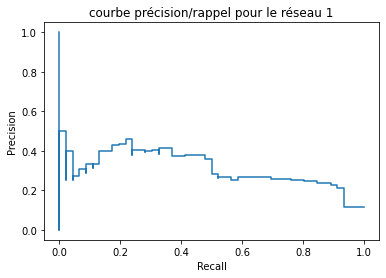

score de précision moyenne pour le réseau 1 est de :  0.3127164585740209


In [11]:
flaten_causal_matrix = np.array(causal_matrix).flatten()
flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

# Calcul de la courbe précision/rappel
precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

# Affichage de la courbe
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title(f"courbe précision/rappel pour le réseau {1}")
plt.show()

print(f"score de précision moyenne pour le réseau {1} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))


Nous remarquons que la méthode Lasso offre, pour le moment, un meilleur score par rapport aux autres méthodes qui étaient de nature symétrique (Matrice de corrélation et information mutuelle). Cependant, elle tend à attribuer des scores importants aussi bien aux enfants qu'aux conjoints dans la relation de cause à effet, ce qui peut mener à des prédictions inexactes. En effet la méthode Lasso nous permet pour chaque variable (gène) de retrouver sa couverture de Markov (enfants, parents, conjoints) ceci n'est donc pas la meilleure méthode pour retrouver les liens de causalité

Nous travaillons avec le réseau 1


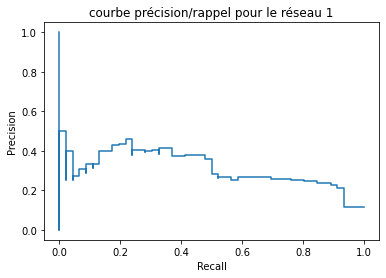

score de précision moyenne pour le réseau 1 est de :  0.3127164585740209
Nous travaillons avec le réseau 2


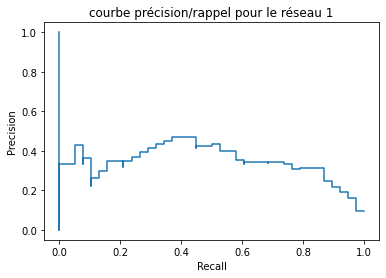

score de précision moyenne pour le réseau 1 est de :  0.3468228236820792
Nous travaillons avec le réseau 3


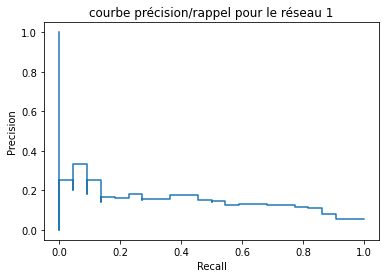

score de précision moyenne pour le réseau 1 est de :  0.15285749223232098
Nous travaillons avec le réseau 4


/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05616562439112727, tolerance: 0.03929502684029648
  model = cd_fast.enet_coordinate_descent_gram(


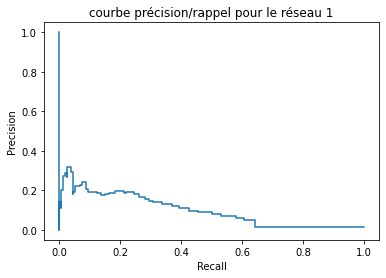

score de précision moyenne pour le réseau 1 est de :  0.09819643796054423


In [84]:
def lasso(data_path,target_path,printMB=True):
    """Fonction pour appliquer la méthode Lasso pour retrouver la couverture de Markov 
    de façon à obtenir un tableau de prédiction, sous la forme d’une liste de liens
    'cause','effte','score'.Calcule les scores de précision/recall obtenus le dataset et le fichier target
    """

    nb_network = data_path[-5] #permet d'avoir le numéro du réseau
    print(f'Nous travaillons avec le réseau {nb_network}')

    ## Chargement des données
    data = pd.read_csv(data_path)
    target = pd.read_csv(target_path)
    data = data.fillna(data.mean(axis=0)) #remplace les valeurs manquante par la moyenne de la colonne 



    # Standardisation des données pour améliorer les performances de Lasso
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
    
    Cause, Effet, Score = [],[],[] #garder en mémoire les valeurs 

    for col in data_scaled.columns:

        # Séparation de la variable "col" des autres variables
        X = data_scaled.drop(col, axis=1)
        y = data_scaled[col]

        # Application de la régression Lasso avec sélection automatique du meilleur alpha via de la cross validation
        # la paramètre alpha nous donne le diamètre de la boulle de recherche 
        lasso = LassoCV(cv=5, random_state=0).fit(X, y)

        # Identification des variables (non nulles) sélectionnées par la méthode Lasso 
        coefficients = lasso.coef_

        selected_features = X.columns[np.abs(coefficients) >1e-3] #selection des variables significative
        selected_coeff = np.abs(coefficients)[np.abs(coefficients) >1e-3]

        for c,s in zip(selected_features,selected_coeff):
            Cause.append(c)
            Effet.append(col)
            Score.append(s)
        # Affichage de la couverture de Markov de V0
        if printMB:
            print(f"La couverture de Markov estimée de {col} comprend les variables suivantes : {selected_features.tolist()}")
            print(f"Les scores de {col} pour les variables précédentes sont les suivant : {np.round(selected_coeff,2).tolist()}")

    predictions_network = pd.DataFrame(np.array([Cause, Effet, Score]).T,columns=["Cause", "Effet", "Score"])
    predictions_network = predictions_network.sort_values(by="Score", ascending=False)

    #Possibilité de rajouter un export au format csv ici 

    #Créer la vraie matrice de causalité
    n = len(data.columns)

    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=data.columns,columns=data.columns)

    for c1,c2 in zip(target.iloc[:,0].values,target.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1

    #construire une causal matrice de prédiction
    causal_matrix_pred = pd.DataFrame(np.zeros((n,n),dtype=np.float64),index=data.columns,columns=data.columns) #initialisation du dataframe

    for i in range(len(predictions_network)):
        c1,c2 = predictions_network.iloc[i,0],predictions_network.iloc[i,1] #correspond au deux noms de colonne
        causal_matrix_pred.loc[c1][c2] = np.round(float(predictions_network.iloc[i,2]),2) #correspond aux scores arrondi à 10-2   

    #Calcul des scores precision/recall
    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

    ## Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

    ## Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {1}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {1} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))


data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,5):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')
    lasso(data_path_i,target_path_i,printMB=False)


## Question 6

Nous travaillons avec le réseau 1


/home/ibotcazou/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


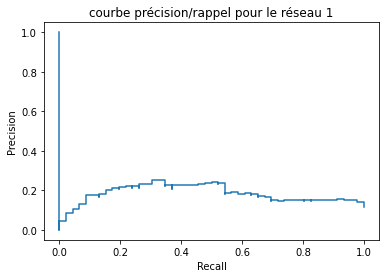

score de précision moyenne pour le réseau 1 est de :  0.18326820852920678
Nous travaillons avec le réseau 2


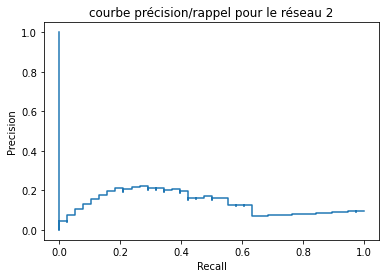

score de précision moyenne pour le réseau 2 est de :  0.1345909659988858
Nous travaillons avec le réseau 3


/home/ibotcazou/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:183: ConvergenceWarning: graphical_lasso: did not converge after 200 iteration: dual gap: -4.967e-04
  warnings.warn(


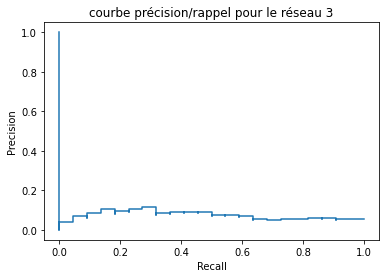

score de précision moyenne pour le réseau 3 est de :  0.07463738788017268


In [85]:
def graphical_lasso(data_path,target_path):
    """Fonction pour appliquer la méthode graphical Lasso pour retrouver la couverture de Markov 
    de façon à obtenir un tableau de prédiction, sous la forme d’une liste de liens
    'cause','effte','score'.Calcule les scores de précision/recall obtenus le dataset et le fichier target
    """

    nb_network = data_path[-5] #permet d'avoir le numéro du réseau
    print(f'Nous travaillons avec le réseau {nb_network}')

    ## Chargement des données
    data = pd.read_csv(data_path)
    target = pd.read_csv(target_path)
    data = data.fillna(data.mean(axis=0)) #remplace les valeurs manquante par la moyenne de la colonne 



    # Standardisation des données pour améliorer les performances de Lasso
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data),index=data.index,columns=data.columns)
    
    # Application de GraphicalLasso
    model = GraphicalLassoCV(cv=5,max_iter=200).fit(data_scaled)

    # Récupération de la matrice de covariance estimée voir lien suivant pour les références
    # lien : https://scikit-learn.org/stable/modules/generated/sklearn.covariance.GraphicalLassoCV.html
    cov_matrix = np.around(model.covariance_, decimals=3)#model.precision_

    # Construction de la matrice de causalité prédite
    causal_matrix_pred = pd.DataFrame(cov_matrix, index=data.columns, columns=data.columns)
 

    #Créer la vraie matrice de causalité
    n = len(data.columns)
    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=data.columns,columns=data.columns)

    for c1,c2 in zip(target.iloc[:,0].values,target.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1

    #Calcul des scores precision/recall
    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

    ## Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

    ## Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))


data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,4):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')
    graphical_lasso(data_path_i,target_path_i)


# Question 7 : Implémentation de Génie 3

ref : https://github.com/vahuynh/GENIE3/blob/master/GENIE3_python/GENIE3.py

In [86]:
from sklearn.ensemble import RandomForestRegressor


def score_genie3(col,data,causal_matrix_pred):
    """Remplir la matrice de causalité pred avec des scores issus de la random forest"""
    n = len(data.columns)
    nb_features = int(np.floor(np.sqrt(n - 1)))
    
    X = data.drop(col, axis=1)
    y = data[col]

    RdFR= RandomForestRegressor(n_estimators=1000, criterion='squared_error', max_features=nb_features)
    RdFR.fit(X, y)

    feature_importances = RdFR.feature_importances_

    causal_matrix_pred.loc[X.columns, col] = feature_importances



Nous travaillons avec le réseau 1


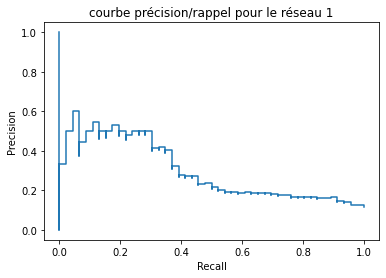

score de précision moyenne pour le réseau 1 est de :  0.2993462823650189
Nous travaillons avec le réseau 2


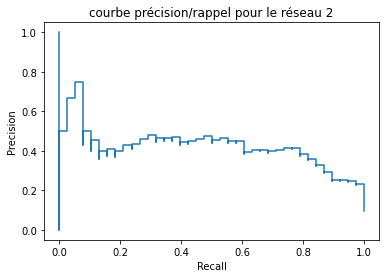

score de précision moyenne pour le réseau 2 est de :  0.42415546321888226
Nous travaillons avec le réseau 3


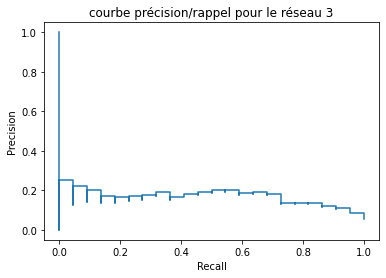

score de précision moyenne pour le réseau 3 est de :  0.17220059198725313
Nous travaillons avec le réseau 4


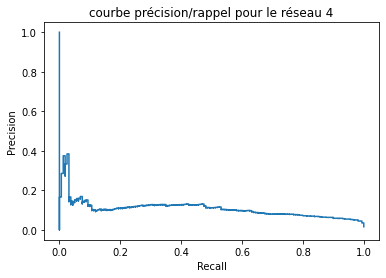

score de précision moyenne pour le réseau 4 est de :  0.10685961822486714


In [105]:
def Genie3(data_path,target_path):
    """Fonction pour appliquer la méthode GENIE3 
    de façon à obtenir une matrice de prédiction pour la causalité.
    Calcule les scores de précision/recall obtenus le dataset et le fichier target
    """

    nb_network = data_path[-5] #permet d'avoir le numéro du réseau
    print(f'Nous travaillons avec le réseau {nb_network}')

    ## Chargement des données
    datai = pd.read_csv(data_path)
    targeti = pd.read_csv(target_path)
    datai = datai.fillna(datai.mean(axis=0)) #remplace les valeurs manquante par la moyenne de la colonne 


    # Standardisation des données pour améliorer les performances de Lasso
    scaler = StandardScaler()
    data_scaledi = pd.DataFrame(scaler.fit_transform(datai),index=datai.index,columns=datai.columns)
    
    #Créer la prédiction matrice de causalité
    n = len(datai.columns)
    causal_matrix_pred = pd.DataFrame(np.zeros((n,n)),index=datai.columns,columns=datai.columns)

    for col in data_scaledi.columns:
        score_genie3(col,data_scaledi,causal_matrix_pred)

    #Créer la vraie matrice de causalité
    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=datai.columns,columns=datai.columns)
    for c1,c2 in zip(targeti.iloc[:,0].values,targeti.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1
    
    #Calcul des scores precision/recall
    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

    ## Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

    ## Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))
    



data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,5):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')
    Genie3(data_path = data_path_i,target_path = target_path_i)

Parmi toutes les méthodes testées jusqu'à présent, nous obtenons les meilleurs scores avec la méthode Génie3 adaptée que nous avons proposée ci-dessus. Cette méthode n'est pas une méthode de prédiction linéaire, pour chaque gène il y a 1000 estimateurs bootstrap construits de manière aléatoire qui donnent une partition de l'espace selon les variables les plus importantes dans la réduction d'hétérogénéité. Nous obtenons ainsi un estimateur final qui regroupe les votes des 1000 autres estimateurs et nous fournit, pour chaque gène, un score de causalité.

### Use GENIE3 from the real modul

In [109]:
from GENIE3 import *

Nous travaillons avec le réseau 1
Tree method: ET
K: 7
Number of trees: 50


running single threaded jobs
Gene 1/20...
Gene 2/20...
Gene 3/20...
Gene 4/20...
Gene 5/20...
Gene 6/20...
Gene 7/20...
Gene 8/20...
Gene 9/20...
Gene 10/20...
Gene 11/20...
Gene 12/20...
Gene 13/20...
Gene 14/20...
Gene 15/20...
Gene 16/20...
Gene 17/20...
Gene 18/20...
Gene 19/20...
Gene 20/20...
Elapsed time: 1.80 seconds
G16	G11	0.423595
G6	G2	0.412020
G2	G6	0.375616
G12	G20	0.280715
G11	G16	0.279438
G19	G16	0.267208
G1	G3	0.260878
G19	G15	0.239826
G9	G14	0.239335
G1	G10	0.218699
G14	G9	0.213940
G5	G17	0.208361
G20	G12	0.196870
G10	G1	0.191528
G7	G9	0.182513
G12	G10	0.179060
G15	G19	0.173319
G17	G5	0.169143
G14	G18	0.166276
G3	G4	0.165420
G9	G8	0.158098
G16	G19	0.155039
G3	G1	0.154212
G4	G1	0.152391
G4	G8	0.145998
G4	G7	0.145023
G10	G12	0.144524
G7	G8	0.140346
G9	G7	0.135352
G7	G18	0.131133
G3	G5	0.130875
G3	G17	0.129590
G9	G15	0.127625
G1	G5	0.126175
G18	G6	0.125817
G18	G14	0.125320
G8	G7	0.123385
G8	G9	0

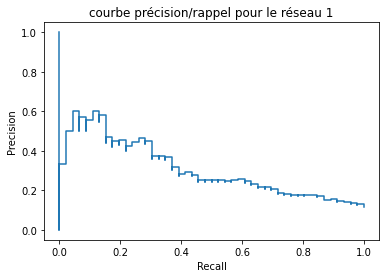

score de précision moyenne pour le réseau 1 est de :  0.30806397148471887
Nous travaillons avec le réseau 2
Tree method: ET
K: 7
Number of trees: 50


running single threaded jobs
Gene 1/20...
Gene 2/20...
Gene 3/20...
Gene 4/20...
Gene 5/20...
Gene 6/20...
Gene 7/20...
Gene 8/20...
Gene 9/20...
Gene 10/20...
Gene 11/20...
Gene 12/20...
Gene 13/20...
Gene 14/20...
Gene 15/20...
Gene 16/20...
Gene 17/20...
Gene 18/20...
Gene 19/20...
Gene 20/20...
Elapsed time: 1.86 seconds
G15	G7	0.327566
G15	G14	0.304295
G7	G15	0.298830
G14	G15	0.296516
G8	G13	0.278033
G17	G5	0.254671
G5	G17	0.247586
G2	G13	0.219349
G13	G8	0.209473
G6	G2	0.206848
G13	G2	0.206450
G6	G1	0.206131
G2	G6	0.190208
G1	G6	0.163553
G19	G11	0.163175
G11	G19	0.154400
G3	G4	0.134801
G9	G18	0.133116
G10	G17	0.132471
G12	G18	0.129132
G4	G18	0.127704
G12	G19	0.127455
G17	G3	0.126457
G18	G4	0.124631
G11	G18	0.124401
G18	G11	0.123681
G3	G17	0.123449
G18	G9	0.122895
G17	G10	0.122440
G3	G5	0.117833
G6	G9	0.116723
G5	G20	0.112970
G10	G5	

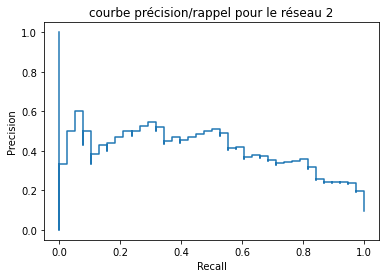

score de précision moyenne pour le réseau 2 est de :  0.40835542777576034
Nous travaillons avec le réseau 3
Tree method: ET
K: 7
Number of trees: 50


running single threaded jobs
Gene 1/20...
Gene 2/20...
Gene 3/20...
Gene 4/20...
Gene 5/20...
Gene 6/20...
Gene 7/20...
Gene 8/20...
Gene 9/20...
Gene 10/20...
Gene 11/20...
Gene 12/20...
Gene 13/20...
Gene 14/20...
Gene 15/20...
Gene 16/20...
Gene 17/20...
Gene 18/20...
Gene 19/20...
Gene 20/20...
Elapsed time: 1.88 seconds
G1	G19	0.522490
G19	G1	0.487822
G8	G20	0.480076
G20	G8	0.323778
G15	G18	0.210125
G15	G14	0.198902
G9	G16	0.187650
G15	G5	0.178428
G15	G9	0.169427
G6	G4	0.167225
G8	G11	0.165487
G16	G6	0.158318
G3	G5	0.157488
G9	G18	0.157121
G15	G16	0.156236
G19	G17	0.150681
G18	G15	0.147660
G9	G15	0.145193
G11	G8	0.144854
G1	G2	0.141781
G6	G3	0.139820
G18	G14	0.138598
G5	G3	0.136530
G3	G14	0.135831
G1	G17	0.135242
G16	G9	0.135062
G18	G9	0.133594
G3	G6	0.132422
G16	G15	0.131703
G19	G2	0.131534
G1	G11	0.130992
G9	G3	0.129029
G15	G7	0.1

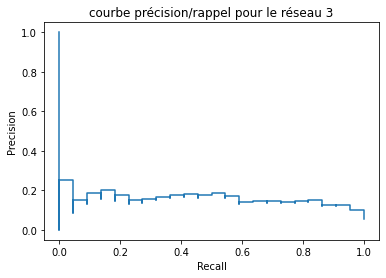

score de précision moyenne pour le réseau 3 est de :  0.16193297347027624
Nous travaillons avec le réseau 4
Tree method: ET
K: 7
Number of trees: 50


running single threaded jobs
Gene 1/100...
Gene 2/100...
Gene 3/100...
Gene 4/100...
Gene 5/100...
Gene 6/100...
Gene 7/100...
Gene 8/100...
Gene 9/100...
Gene 10/100...
Gene 11/100...
Gene 12/100...
Gene 13/100...
Gene 14/100...
Gene 15/100...
Gene 16/100...
Gene 17/100...
Gene 18/100...
Gene 19/100...
Gene 20/100...
Gene 21/100...
Gene 22/100...
Gene 23/100...
Gene 24/100...
Gene 25/100...
Gene 26/100...
Gene 27/100...
Gene 28/100...
Gene 29/100...
Gene 30/100...
Gene 31/100...
Gene 32/100...
Gene 33/100...
Gene 34/100...
Gene 35/100...
Gene 36/100...
Gene 37/100...
Gene 38/100...
Gene 39/100...
Gene 40/100...
Gene 41/100...
Gene 42/100...
Gene 43/100...
Gene 44/100...
Gene 45/100...
Gene 46/100...
Gene 47/100...
Gene 48/100...
Gene 49/100...
Gene 50/100...
Gene 51/100...
Gene 52/100...
Gene 53/100...
Gene 54/100...
Gene 55/100...
Gene

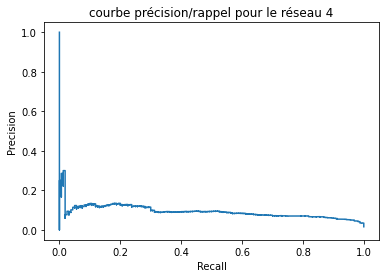

score de précision moyenne pour le réseau 4 est de :  0.09311384296048997
Nous travaillons avec le réseau 5
Tree method: ET
K: 7
Number of trees: 50


running single threaded jobs
Gene 1/100...
Gene 2/100...
Gene 3/100...
Gene 4/100...
Gene 5/100...
Gene 6/100...
Gene 7/100...
Gene 8/100...
Gene 9/100...
Gene 10/100...
Gene 11/100...
Gene 12/100...
Gene 13/100...
Gene 14/100...
Gene 15/100...
Gene 16/100...
Gene 17/100...
Gene 18/100...
Gene 19/100...
Gene 20/100...
Gene 21/100...
Gene 22/100...
Gene 23/100...
Gene 24/100...
Gene 25/100...
Gene 26/100...
Gene 27/100...
Gene 28/100...
Gene 29/100...
Gene 30/100...
Gene 31/100...
Gene 32/100...
Gene 33/100...
Gene 34/100...
Gene 35/100...
Gene 36/100...
Gene 37/100...
Gene 38/100...
Gene 39/100...
Gene 40/100...
Gene 41/100...
Gene 42/100...
Gene 43/100...
Gene 44/100...
Gene 45/100...
Gene 46/100...
Gene 47/100...
Gene 48/100...
Gene 49/100...
Gene 50/100...
Gene 51/100...
Gene 52/100...
Gene 53/100...
Gene 54/100...
Gene 55/100...
Gene

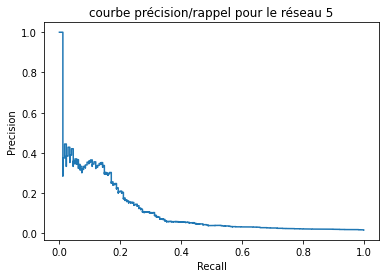

score de précision moyenne pour le réseau 5 est de :  0.11425879735174235


In [129]:
def Genie3_true(data_path,target_path):
    """Fonction pour appliquer la méthode GENIE3 
    de façon à obtenir une matrice de prédiction pour la causalité.
    Calcule les scores de précision/recall obtenus le dataset et le fichier target
    """

    nb_network = data_path[-5] #permet d'avoir le numéro du réseau
    print(f'Nous travaillons avec le réseau {nb_network}')

    ## Chargement des données
    datai = pd.read_csv(data_path)
    targeti = pd.read_csv(target_path)
    datai = datai.fillna(datai.mean(axis=0)) #remplace les valeurs manquante par la moyenne de la colonne 


    # Standardisation des données pour améliorer les performances de Lasso
    scaler = StandardScaler()
    data_scaledi = pd.DataFrame(scaler.fit_transform(datai),index=datai.index,columns=datai.columns)
    
    # Use Extra-Trees method
    tree_method='ET'
    # Number of randomly chosen candidate regulators at each node of a tree
    K = 7
    # Number of trees per ensemble
    ntrees = 50
    # Run the method with these settings
    VIM3 = GENIE3(np.array(data_scaledi),tree_method=tree_method,K=K,ntrees=ntrees)

    #Créer la prédiction matrice de causalité
    n = len(datai.columns)
    causal_matrix_pred = pd.DataFrame(VIM3,index=datai.columns,columns=datai.columns)

    get_link_list(VIM3)

    #Créer la vraie matrice de causalité
    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=datai.columns,columns=datai.columns)
    for c1,c2 in zip(targeti.iloc[:,0].values,targeti.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1
    
    #Calcul des scores precision/recall
    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

    ## Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

    ## Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))
    



data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,6):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')
    Genie3_true(data_path = data_path_i,target_path = target_path_i)

# Question 8-9-10-11 : Xgboost une autre méthode pour la sélection de variables basée sur la régression

In [90]:

# Séparation de la variable V0 des autres variables
X = data.drop('V0', axis=1)
y = data['V0']

# Standardisation des données pour améliorer les performances de Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
import xgboost as xgb


def score_xgboost(col,data,causal_matrix_pred):
    """Remplir la matrice de causalité pred avec des scores issus de xgboost"""
    n = len(data.columns)
    nb_features = int(np.floor(np.sqrt(n - 1)))
    
    X = data.drop(col, axis=1)
    y = data[col]

    # Configuration du modèle XGBoost
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.25, 
                            learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 1000)
    # Entraînement du modèle
    model.fit(X, y)

    feature_importances = model.feature_importances_

    causal_matrix_pred.loc[X.columns, col] = feature_importances



Nous travaillons avec le réseau 1


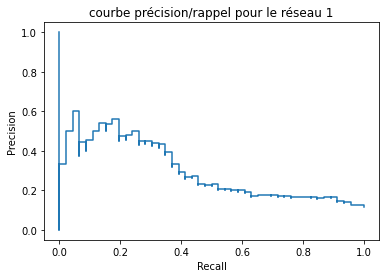

score de précision moyenne pour le réseau 1 est de :  0.2977954380556083
Nous travaillons avec le réseau 2


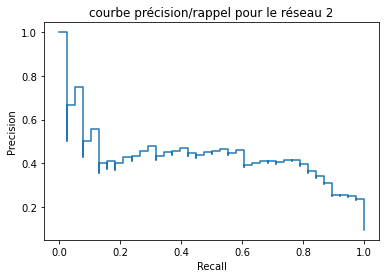

score de précision moyenne pour le réseau 2 est de :  0.44026185352049274
Nous travaillons avec le réseau 3


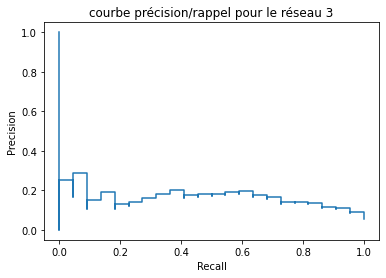

score de précision moyenne pour le réseau 3 est de :  0.16836661225097754
Nous travaillons avec le réseau 4


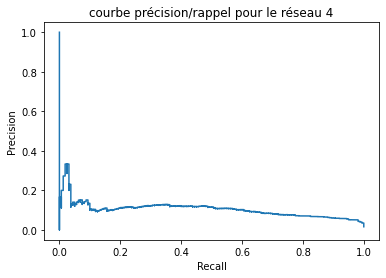

score de précision moyenne pour le réseau 4 est de :  0.10420125023631983


In [106]:
def XGboost(data_path,target_path):
    """Fonction pour appliquer la méthode Xgboost 
    de façon à obtenir une matrice de prédiction pour la causalité.
    Calcule les scores de précision/recall obtenus le dataset et le fichier target
    """

    nb_network = data_path[-5] #permet d'avoir le numéro du réseau
    print(f'Nous travaillons avec le réseau {nb_network}')

    ## Chargement des données
    datai = pd.read_csv(data_path)
    targeti = pd.read_csv(target_path)
    datai = datai.fillna(datai.mean(axis=0)) #remplace les valeurs manquante par la moyenne de la colonne 


    # Standardisation des données pour améliorer les performances de Lasso
    scaler = StandardScaler()
    data_scaledi = pd.DataFrame(scaler.fit_transform(datai),index=datai.index,columns=datai.columns)
    
    #Créer la prédiction matrice de causalité
    n = len(datai.columns)
    causal_matrix_pred = pd.DataFrame(np.zeros((n,n)),index=datai.columns,columns=datai.columns)

    for col in data_scaledi.columns:
        score_xgboost(col,data_scaledi,causal_matrix_pred)

    #Créer la vraie matrice de causalité
    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=datai.columns,columns=datai.columns)
    for c1,c2 in zip(targeti.iloc[:,0].values,targeti.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1
    
    #Calcul des scores precision/recall
    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_causal_matrix_pred = np.array(causal_matrix_pred).flatten()

    ## Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_causal_matrix_pred)

    ## Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_causal_matrix_pred))
    



data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,5):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')
    Genie3(data_path = data_path_i,target_path = target_path_i)